In [36]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

data_train = MNIST('./data',
                   download=True,
                   transform=transforms.Compose([
                       transforms.Resize((32, 32)),
                       transforms.ToTensor()]))
data_test = MNIST('./data',
                  train=False,
                  download=True,
                  transform=transforms.Compose([
                      transforms.Resize((32, 32)),
                      transforms.ToTensor()]))
data_train_loader = DataLoader(data_train, batch_size=256,
    shuffle=True, num_workers=8)
data_test_loader = DataLoader(data_test, batch_size=1024,
    num_workers=8)

<function matplotlib.pyplot.show(close=None, block=None)>

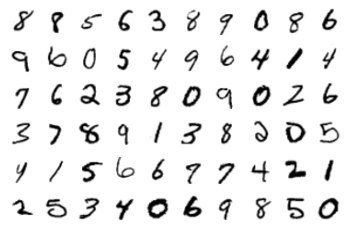

In [37]:
import matplotlib.pyplot as plt
figure = plt.figure()
num_of_images = 60

for imgs, targets in data_train_loader: 
    break
for index in range(num_of_images):
    plt.subplot(6,10,index+1)
    plt.axis('off')
    img = imgs[index, ...]
    plt.imshow(img.numpy().squeeze(), cmap = 'gray_r')
plt.show

In [38]:
import torch
import torch.nn as nn

class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc3 = nn.Linear(16*6*6, 120)
        self.fc4 = nn.Linear(120, 84)
        self.fc5 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

if __name__ == "__main__":
    model = LeNet() # 初始化实例
    ret = model(torch.randn(1, 1, 32, 32)) # 输入一张图片，测试输出结果
    ret.shape # torch.Size([1, 10])  

In [39]:
import torch
import torch.nn as nn
#from torch.nn.model import LeNet

# ... 此处略去定义训练数据载入器的代码，具体可参考代码4.3

model = LeNet() # 定义LeNet模型
model.train() # 切换模型到训练状态
lr = 0.01 # 定义学习率
criterion = nn.CrossEntropyLoss() # 定义损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, 
    weight_decay=5e-4) # 定义随机梯度下降优化器

train_loss = 0
correct = 0
total = 0
for epoch in range(0,20):
    print(epoch)
    for batch_idx, (inputs, targets) in enumerate(data_train_loader):

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        print(batch_idx, len(data_train_loader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
            % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))


0
0 235 Loss: 2.309 | Acc: 9.375% (24/256)
1 235 Loss: 2.307 | Acc: 11.133% (57/512)
2 235 Loss: 2.307 | Acc: 9.766% (75/768)
3 235 Loss: 2.308 | Acc: 10.156% (104/1024)
4 235 Loss: 2.308 | Acc: 9.922% (127/1280)
5 235 Loss: 2.307 | Acc: 10.286% (158/1536)
6 235 Loss: 2.306 | Acc: 10.324% (185/1792)
7 235 Loss: 2.307 | Acc: 10.254% (210/2048)
8 235 Loss: 2.306 | Acc: 10.200% (235/2304)
9 235 Loss: 2.306 | Acc: 10.000% (256/2560)
10 235 Loss: 2.306 | Acc: 9.979% (281/2816)
11 235 Loss: 2.306 | Acc: 9.863% (303/3072)
12 235 Loss: 2.305 | Acc: 9.856% (328/3328)
13 235 Loss: 2.305 | Acc: 9.961% (357/3584)
14 235 Loss: 2.305 | Acc: 10.026% (385/3840)
15 235 Loss: 2.305 | Acc: 10.034% (411/4096)
16 235 Loss: 2.305 | Acc: 10.179% (443/4352)
17 235 Loss: 2.304 | Acc: 10.417% (480/4608)
18 235 Loss: 2.304 | Acc: 10.362% (504/4864)
19 235 Loss: 2.304 | Acc: 10.410% (533/5120)
20 235 Loss: 2.304 | Acc: 10.342% (556/5376)
21 235 Loss: 2.304 | Acc: 10.263% (578/5632)
22 235 Loss: 2.304 | Acc: 10.32

178 235 Loss: 1.867 | Acc: 37.965% (17397/45824)
179 235 Loss: 1.860 | Acc: 38.194% (17600/46080)
180 235 Loss: 1.852 | Acc: 38.441% (17812/46336)
181 235 Loss: 1.845 | Acc: 38.687% (18025/46592)
182 235 Loss: 1.839 | Acc: 38.905% (18226/46848)
183 235 Loss: 1.832 | Acc: 39.137% (18435/47104)
184 235 Loss: 1.825 | Acc: 39.367% (18644/47360)
185 235 Loss: 1.818 | Acc: 39.604% (18858/47616)
186 235 Loss: 1.811 | Acc: 39.825% (19065/47872)
187 235 Loss: 1.805 | Acc: 40.039% (19270/48128)
188 235 Loss: 1.798 | Acc: 40.284% (19491/48384)
189 235 Loss: 1.791 | Acc: 40.502% (19700/48640)
190 235 Loss: 1.784 | Acc: 40.746% (19923/48896)
191 235 Loss: 1.777 | Acc: 40.979% (20142/49152)
192 235 Loss: 1.771 | Acc: 41.192% (20352/49408)
193 235 Loss: 1.765 | Acc: 41.410% (20566/49664)
194 235 Loss: 1.758 | Acc: 41.639% (20786/49920)
195 235 Loss: 1.751 | Acc: 41.853% (21000/50176)
196 235 Loss: 1.745 | Acc: 42.051% (21207/50432)
197 235 Loss: 1.739 | Acc: 42.274% (21428/50688)
198 235 Loss: 1.733 

114 235 Loss: 3.443 | Acc: 62.634% (56020/89440)
115 235 Loss: 3.416 | Acc: 62.716% (56254/89696)
116 235 Loss: 3.389 | Acc: 62.796% (56486/89952)
117 235 Loss: 3.362 | Acc: 62.879% (56722/90208)
118 235 Loss: 3.336 | Acc: 62.966% (56962/90464)
119 235 Loss: 3.310 | Acc: 63.054% (57203/90720)
120 235 Loss: 3.285 | Acc: 63.134% (57437/90976)
121 235 Loss: 3.260 | Acc: 63.221% (57678/91232)
122 235 Loss: 3.235 | Acc: 63.301% (57913/91488)
123 235 Loss: 3.211 | Acc: 63.380% (58147/91744)
124 235 Loss: 3.187 | Acc: 63.463% (58386/92000)
125 235 Loss: 3.165 | Acc: 63.524% (58605/92256)
126 235 Loss: 3.142 | Acc: 63.609% (58846/92512)
127 235 Loss: 3.118 | Acc: 63.698% (59091/92768)
128 235 Loss: 3.096 | Acc: 63.781% (59332/93024)
129 235 Loss: 3.074 | Acc: 63.860% (59569/93280)
130 235 Loss: 3.052 | Acc: 63.937% (59804/93536)
131 235 Loss: 3.031 | Acc: 64.010% (60036/93792)
132 235 Loss: 3.010 | Acc: 64.091% (60276/94048)
133 235 Loss: 2.989 | Acc: 64.167% (60512/94304)
134 235 Loss: 2.969 

44 235 Loss: 9.570 | Acc: 72.496% (95347/131520)
45 235 Loss: 9.366 | Acc: 72.536% (95585/131776)
46 235 Loss: 9.170 | Acc: 72.580% (95829/132032)
47 235 Loss: 8.982 | Acc: 72.626% (96075/132288)
48 235 Loss: 8.802 | Acc: 72.669% (96319/132544)
49 235 Loss: 8.628 | Acc: 72.714% (96564/132800)
50 235 Loss: 8.463 | Acc: 72.753% (96802/133056)
51 235 Loss: 8.304 | Acc: 72.793% (97042/133312)
52 235 Loss: 8.150 | Acc: 72.836% (97286/133568)
53 235 Loss: 8.001 | Acc: 72.882% (97533/133824)
54 235 Loss: 7.859 | Acc: 72.924% (97776/134080)
55 235 Loss: 7.722 | Acc: 72.966% (98019/134336)
56 235 Loss: 7.590 | Acc: 73.005% (98259/134592)
57 235 Loss: 7.462 | Acc: 73.050% (98507/134848)
58 235 Loss: 7.338 | Acc: 73.088% (98745/135104)
59 235 Loss: 7.218 | Acc: 73.132% (98991/135360)
60 235 Loss: 7.102 | Acc: 73.174% (99235/135616)
61 235 Loss: 6.989 | Acc: 73.217% (99481/135872)
62 235 Loss: 6.881 | Acc: 73.259% (99726/136128)
63 235 Loss: 6.775 | Acc: 73.301% (99971/136384)
64 235 Loss: 6.674 |

210 235 Loss: 2.155 | Acc: 78.090% (135889/174016)
211 235 Loss: 2.145 | Acc: 78.117% (136136/174272)
212 235 Loss: 2.136 | Acc: 78.143% (136381/174528)
213 235 Loss: 2.127 | Acc: 78.168% (136626/174784)
214 235 Loss: 2.117 | Acc: 78.196% (136874/175040)
215 235 Loss: 2.108 | Acc: 78.221% (137118/175296)
216 235 Loss: 2.099 | Acc: 78.250% (137369/175552)
217 235 Loss: 2.090 | Acc: 78.276% (137616/175808)
218 235 Loss: 2.081 | Acc: 78.303% (137864/176064)
219 235 Loss: 2.072 | Acc: 78.327% (138107/176320)
220 235 Loss: 2.064 | Acc: 78.348% (138344/176576)
221 235 Loss: 2.055 | Acc: 78.374% (138590/176832)
222 235 Loss: 2.046 | Acc: 78.399% (138835/177088)
223 235 Loss: 2.037 | Acc: 78.426% (139083/177344)
224 235 Loss: 2.029 | Acc: 78.448% (139324/177600)
225 235 Loss: 2.021 | Acc: 78.473% (139569/177856)
226 235 Loss: 2.012 | Acc: 78.502% (139821/178112)
227 235 Loss: 2.004 | Acc: 78.528% (140068/178368)
228 235 Loss: 1.996 | Acc: 78.554% (140316/178624)
229 235 Loss: 1.988 | Acc: 78.5

140 235 Loss: 3.362 | Acc: 81.654% (176450/216096)
141 235 Loss: 3.339 | Acc: 81.671% (176697/216352)
142 235 Loss: 3.317 | Acc: 81.688% (176943/216608)
143 235 Loss: 3.294 | Acc: 81.706% (177191/216864)
144 235 Loss: 3.272 | Acc: 81.723% (177436/217120)
145 235 Loss: 3.251 | Acc: 81.740% (177684/217376)
146 235 Loss: 3.229 | Acc: 81.756% (177928/217632)
147 235 Loss: 3.208 | Acc: 81.774% (178176/217888)
148 235 Loss: 3.187 | Acc: 81.793% (178427/218144)
149 235 Loss: 3.167 | Acc: 81.808% (178669/218400)
150 235 Loss: 3.146 | Acc: 81.827% (178920/218656)
151 235 Loss: 3.126 | Acc: 81.845% (179169/218912)
152 235 Loss: 3.107 | Acc: 81.862% (179415/219168)
153 235 Loss: 3.087 | Acc: 81.880% (179664/219424)
154 235 Loss: 3.068 | Acc: 81.898% (179913/219680)
155 235 Loss: 3.049 | Acc: 81.914% (180159/219936)
156 235 Loss: 3.030 | Acc: 81.932% (180408/220192)
157 235 Loss: 3.011 | Acc: 81.951% (180660/220448)
158 235 Loss: 2.993 | Acc: 81.969% (180909/220704)
159 235 Loss: 2.975 | Acc: 81.9

70 235 Loss: 6.900 | Acc: 84.153% (217264/258176)
71 235 Loss: 6.805 | Acc: 84.167% (217514/258432)
72 235 Loss: 6.713 | Acc: 84.180% (217763/258688)
73 235 Loss: 6.624 | Acc: 84.192% (218010/258944)
74 235 Loss: 6.538 | Acc: 84.202% (218252/259200)
75 235 Loss: 6.453 | Acc: 84.214% (218498/259456)
76 235 Loss: 6.371 | Acc: 84.226% (218745/259712)
77 235 Loss: 6.291 | Acc: 84.236% (218987/259968)
78 235 Loss: 6.213 | Acc: 84.247% (219231/260224)
79 235 Loss: 6.137 | Acc: 84.258% (219474/260480)
80 235 Loss: 6.062 | Acc: 84.271% (219725/260736)
81 235 Loss: 5.989 | Acc: 84.284% (219975/260992)
82 235 Loss: 5.918 | Acc: 84.296% (220222/261248)
83 235 Loss: 5.848 | Acc: 84.309% (220471/261504)
84 235 Loss: 5.780 | Acc: 84.322% (220722/261760)
85 235 Loss: 5.714 | Acc: 84.335% (220972/262016)
86 235 Loss: 5.650 | Acc: 84.346% (221217/262272)
87 235 Loss: 5.587 | Acc: 84.358% (221463/262528)
88 235 Loss: 5.526 | Acc: 84.369% (221707/262784)
89 235 Loss: 5.465 | Acc: 84.381% (221957/263040)


233 235 Loss: 2.156 | Acc: 85.964% (257810/299904)
234 235 Loss: 2.147 | Acc: 85.968% (257905/300000)
5
0 235 Loss: 504.697 | Acc: 85.978% (258155/300256)
1 235 Loss: 252.378 | Acc: 85.988% (258405/300512)
2 235 Loss: 168.270 | Acc: 85.999% (258657/300768)
3 235 Loss: 126.219 | Acc: 86.009% (258908/301024)
4 235 Loss: 100.983 | Acc: 86.020% (259160/301280)
5 235 Loss: 84.167 | Acc: 86.029% (259409/301536)
6 235 Loss: 72.156 | Acc: 86.038% (259657/301792)
7 235 Loss: 63.147 | Acc: 86.048% (259906/302048)
8 235 Loss: 56.137 | Acc: 86.058% (260156/302304)
9 235 Loss: 50.534 | Acc: 86.067% (260404/302560)
10 235 Loss: 45.944 | Acc: 86.078% (260657/302816)
11 235 Loss: 42.127 | Acc: 86.087% (260905/303072)
12 235 Loss: 38.891 | Acc: 86.097% (261155/303328)
13 235 Loss: 36.121 | Acc: 86.106% (261403/303584)
14 235 Loss: 33.717 | Acc: 86.116% (261655/303840)
15 235 Loss: 31.615 | Acc: 86.125% (261904/304096)
16 235 Loss: 29.761 | Acc: 86.135% (262153/304352)
17 235 Loss: 28.112 | Acc: 86.145%

160 235 Loss: 3.210 | Acc: 87.385% (298171/341216)
161 235 Loss: 3.191 | Acc: 87.393% (298422/341472)
162 235 Loss: 3.172 | Acc: 87.401% (298672/341728)
163 235 Loss: 3.153 | Acc: 87.408% (298921/341984)
164 235 Loss: 3.134 | Acc: 87.416% (299172/342240)
165 235 Loss: 3.116 | Acc: 87.423% (299421/342496)
166 235 Loss: 3.098 | Acc: 87.431% (299671/342752)
167 235 Loss: 3.080 | Acc: 87.439% (299923/343008)
168 235 Loss: 3.062 | Acc: 87.446% (300170/343264)
169 235 Loss: 3.045 | Acc: 87.454% (300421/343520)
170 235 Loss: 3.027 | Acc: 87.462% (300675/343776)
171 235 Loss: 3.010 | Acc: 87.471% (300928/344032)
172 235 Loss: 2.993 | Acc: 87.478% (301176/344288)
173 235 Loss: 2.976 | Acc: 87.485% (301426/344544)
174 235 Loss: 2.959 | Acc: 87.493% (301675/344800)
175 235 Loss: 2.943 | Acc: 87.499% (301920/345056)
176 235 Loss: 2.927 | Acc: 87.506% (302170/345312)
177 235 Loss: 2.911 | Acc: 87.514% (302420/345568)
178 235 Loss: 2.895 | Acc: 87.522% (302672/345824)
179 235 Loss: 2.879 | Acc: 87.5

90 235 Loss: 5.812 | Acc: 88.519% (339290/383296)
91 235 Loss: 5.749 | Acc: 88.525% (339541/383552)
92 235 Loss: 5.688 | Acc: 88.531% (339789/383808)
93 235 Loss: 5.628 | Acc: 88.537% (340040/384064)
94 235 Loss: 5.570 | Acc: 88.544% (340291/384320)
95 235 Loss: 5.512 | Acc: 88.550% (340542/384576)
96 235 Loss: 5.457 | Acc: 88.555% (340788/384832)
97 235 Loss: 5.402 | Acc: 88.561% (341039/385088)
98 235 Loss: 5.348 | Acc: 88.569% (341294/385344)
99 235 Loss: 5.295 | Acc: 88.574% (341543/385600)
100 235 Loss: 5.243 | Acc: 88.581% (341796/385856)
101 235 Loss: 5.193 | Acc: 88.587% (342046/386112)
102 235 Loss: 5.143 | Acc: 88.594% (342298/386368)
103 235 Loss: 5.094 | Acc: 88.600% (342547/386624)
104 235 Loss: 5.046 | Acc: 88.605% (342795/386880)
105 235 Loss: 4.999 | Acc: 88.612% (343048/387136)
106 235 Loss: 4.953 | Acc: 88.619% (343301/387392)
107 235 Loss: 4.907 | Acc: 88.625% (343552/387648)
108 235 Loss: 4.863 | Acc: 88.630% (343800/387904)
109 235 Loss: 4.819 | Acc: 88.636% (34404

18 235 Loss: 28.397 | Acc: 89.444% (380016/424864)
19 235 Loss: 26.980 | Acc: 89.450% (380269/425120)
20 235 Loss: 25.698 | Acc: 89.455% (380521/425376)
21 235 Loss: 24.533 | Acc: 89.459% (380768/425632)
22 235 Loss: 23.469 | Acc: 89.464% (381015/425888)
23 235 Loss: 22.494 | Acc: 89.468% (381264/426144)
24 235 Loss: 21.598 | Acc: 89.473% (381511/426400)
25 235 Loss: 20.771 | Acc: 89.477% (381757/426656)
26 235 Loss: 20.004 | Acc: 89.482% (382009/426912)
27 235 Loss: 19.292 | Acc: 89.487% (382261/427168)
28 235 Loss: 18.629 | Acc: 89.492% (382512/427424)
29 235 Loss: 18.009 | Acc: 89.498% (382764/427680)
30 235 Loss: 17.431 | Acc: 89.503% (383015/427936)
31 235 Loss: 16.888 | Acc: 89.509% (383269/428192)
32 235 Loss: 16.377 | Acc: 89.514% (383522/428448)
33 235 Loss: 15.898 | Acc: 89.519% (383773/428704)
34 235 Loss: 15.445 | Acc: 89.525% (384025/428960)
35 235 Loss: 15.017 | Acc: 89.530% (384278/429216)
36 235 Loss: 14.613 | Acc: 89.535% (384529/429472)
37 235 Loss: 14.230 | Acc: 89.5

184 235 Loss: 2.969 | Acc: 90.239% (421741/467360)
185 235 Loss: 2.953 | Acc: 90.243% (421993/467616)
186 235 Loss: 2.937 | Acc: 90.248% (422247/467872)
187 235 Loss: 2.922 | Acc: 90.253% (422498/468128)
188 235 Loss: 2.907 | Acc: 90.257% (422751/468384)
189 235 Loss: 2.892 | Acc: 90.262% (423005/468640)
190 235 Loss: 2.877 | Acc: 90.267% (423258/468896)
191 235 Loss: 2.862 | Acc: 90.271% (423507/469152)
192 235 Loss: 2.848 | Acc: 90.275% (423759/469408)
193 235 Loss: 2.833 | Acc: 90.280% (424013/469664)
194 235 Loss: 2.819 | Acc: 90.283% (424259/469920)
195 235 Loss: 2.805 | Acc: 90.287% (424509/470176)
196 235 Loss: 2.791 | Acc: 90.291% (424757/470432)
197 235 Loss: 2.777 | Acc: 90.295% (425010/470688)
198 235 Loss: 2.764 | Acc: 90.299% (425260/470944)
199 235 Loss: 2.750 | Acc: 90.304% (425513/471200)
200 235 Loss: 2.737 | Acc: 90.308% (425763/471456)
201 235 Loss: 2.724 | Acc: 90.312% (426012/471712)
202 235 Loss: 2.710 | Acc: 90.317% (426266/471968)
203 235 Loss: 2.697 | Acc: 90.3

115 235 Loss: 4.812 | Acc: 90.909% (463360/509696)
116 235 Loss: 4.772 | Acc: 90.913% (463613/509952)
117 235 Loss: 4.731 | Acc: 90.917% (463866/510208)
118 235 Loss: 4.692 | Acc: 90.920% (464116/510464)
119 235 Loss: 4.653 | Acc: 90.924% (464368/510720)
120 235 Loss: 4.616 | Acc: 90.928% (464618/510976)
121 235 Loss: 4.578 | Acc: 90.932% (464872/511232)
122 235 Loss: 4.541 | Acc: 90.935% (465124/511488)
123 235 Loss: 4.505 | Acc: 90.939% (465376/511744)
124 235 Loss: 4.469 | Acc: 90.943% (465627/512000)
125 235 Loss: 4.434 | Acc: 90.946% (465878/512256)
126 235 Loss: 4.400 | Acc: 90.950% (466132/512512)
127 235 Loss: 4.366 | Acc: 90.954% (466382/512768)
128 235 Loss: 4.333 | Acc: 90.957% (466632/513024)
129 235 Loss: 4.300 | Acc: 90.961% (466884/513280)
130 235 Loss: 4.267 | Acc: 90.965% (467136/513536)
131 235 Loss: 4.235 | Acc: 90.969% (467390/513792)
132 235 Loss: 4.204 | Acc: 90.971% (467636/514048)
133 235 Loss: 4.173 | Acc: 90.974% (467883/514304)
134 235 Loss: 4.143 | Acc: 90.9

41 235 Loss: 13.497 | Acc: 91.464% (503739/550752)
42 235 Loss: 13.183 | Acc: 91.468% (503995/551008)
43 235 Loss: 12.884 | Acc: 91.471% (504245/551264)
44 235 Loss: 12.599 | Acc: 91.474% (504497/551520)
45 235 Loss: 12.327 | Acc: 91.476% (504742/551776)
46 235 Loss: 12.067 | Acc: 91.479% (504992/552032)
47 235 Loss: 11.816 | Acc: 91.482% (505245/552288)
48 235 Loss: 11.576 | Acc: 91.485% (505497/552544)
49 235 Loss: 11.345 | Acc: 91.489% (505750/552800)
50 235 Loss: 11.123 | Acc: 91.493% (506005/553056)
51 235 Loss: 10.911 | Acc: 91.495% (506253/553312)
52 235 Loss: 10.706 | Acc: 91.498% (506504/553568)
53 235 Loss: 10.509 | Acc: 91.501% (506755/553824)
54 235 Loss: 10.318 | Acc: 91.505% (507010/554080)
55 235 Loss: 10.135 | Acc: 91.508% (507262/554336)
56 235 Loss: 9.959 | Acc: 91.511% (507513/554592)
57 235 Loss: 9.788 | Acc: 91.514% (507765/554848)
58 235 Loss: 9.623 | Acc: 91.517% (508014/555104)
59 235 Loss: 9.464 | Acc: 91.520% (508265/555360)
60 235 Loss: 9.309 | Acc: 91.523% (

206 235 Loss: 2.777 | Acc: 91.965% (545344/592992)
207 235 Loss: 2.764 | Acc: 91.968% (545599/593248)
208 235 Loss: 2.751 | Acc: 91.971% (545853/593504)
209 235 Loss: 2.738 | Acc: 91.974% (546105/593760)
210 235 Loss: 2.726 | Acc: 91.976% (546352/594016)
211 235 Loss: 2.713 | Acc: 91.979% (546605/594272)
212 235 Loss: 2.701 | Acc: 91.982% (546856/594528)
213 235 Loss: 2.688 | Acc: 91.984% (547109/594784)
214 235 Loss: 2.676 | Acc: 91.988% (547363/595040)
215 235 Loss: 2.664 | Acc: 91.990% (547615/595296)
216 235 Loss: 2.651 | Acc: 91.993% (547868/595552)
217 235 Loss: 2.640 | Acc: 91.996% (548117/595808)
218 235 Loss: 2.628 | Acc: 91.999% (548370/596064)
219 235 Loss: 2.616 | Acc: 92.001% (548622/596320)
220 235 Loss: 2.605 | Acc: 92.004% (548873/596576)
221 235 Loss: 2.593 | Acc: 92.007% (549127/596832)
222 235 Loss: 2.581 | Acc: 92.010% (549380/597088)
223 235 Loss: 2.570 | Acc: 92.013% (549633/597344)
224 235 Loss: 2.559 | Acc: 92.015% (549882/597600)
225 235 Loss: 2.548 | Acc: 92.0

135 235 Loss: 4.281 | Acc: 92.396% (586544/634816)
136 235 Loss: 4.250 | Acc: 92.399% (586800/635072)
137 235 Loss: 4.220 | Acc: 92.401% (587052/635328)
138 235 Loss: 4.190 | Acc: 92.404% (587304/635584)
139 235 Loss: 4.160 | Acc: 92.406% (587556/635840)
140 235 Loss: 4.131 | Acc: 92.409% (587810/636096)
141 235 Loss: 4.102 | Acc: 92.412% (588063/636352)
142 235 Loss: 4.073 | Acc: 92.414% (588317/636608)
143 235 Loss: 4.045 | Acc: 92.417% (588568/636864)
144 235 Loss: 4.018 | Acc: 92.419% (588822/637120)
145 235 Loss: 3.991 | Acc: 92.422% (589073/637376)
146 235 Loss: 3.964 | Acc: 92.424% (589324/637632)
147 235 Loss: 3.937 | Acc: 92.426% (589577/637888)
148 235 Loss: 3.911 | Acc: 92.428% (589825/638144)
149 235 Loss: 3.885 | Acc: 92.431% (590079/638400)
150 235 Loss: 3.860 | Acc: 92.433% (590332/638656)
151 235 Loss: 3.835 | Acc: 92.436% (590582/638912)
152 235 Loss: 3.811 | Acc: 92.438% (590833/639168)
153 235 Loss: 3.786 | Acc: 92.440% (591086/639424)
154 235 Loss: 3.762 | Acc: 92.4

61 235 Loss: 9.511 | Acc: 92.768% (626993/675872)
62 235 Loss: 9.360 | Acc: 92.770% (627246/676128)
63 235 Loss: 9.215 | Acc: 92.773% (627501/676384)
64 235 Loss: 9.074 | Acc: 92.775% (627752/676640)
65 235 Loss: 8.937 | Acc: 92.777% (628005/676896)
66 235 Loss: 8.805 | Acc: 92.779% (628256/677152)
67 235 Loss: 8.676 | Acc: 92.781% (628506/677408)
68 235 Loss: 8.551 | Acc: 92.783% (628759/677664)
69 235 Loss: 8.430 | Acc: 92.785% (629010/677920)
70 235 Loss: 8.311 | Acc: 92.788% (629264/678176)
71 235 Loss: 8.196 | Acc: 92.790% (629518/678432)
72 235 Loss: 8.085 | Acc: 92.792% (629771/678688)
73 235 Loss: 7.976 | Acc: 92.795% (630025/678944)
74 235 Loss: 7.871 | Acc: 92.796% (630272/679200)
75 235 Loss: 7.768 | Acc: 92.798% (630522/679456)
76 235 Loss: 7.668 | Acc: 92.800% (630774/679712)
77 235 Loss: 7.570 | Acc: 92.803% (631029/679968)
78 235 Loss: 7.474 | Acc: 92.805% (631283/680224)
79 235 Loss: 7.382 | Acc: 92.807% (631531/680480)
80 235 Loss: 7.291 | Acc: 92.808% (631779/680736)


226 235 Loss: 2.628 | Acc: 93.114% (668665/718112)
227 235 Loss: 2.617 | Acc: 93.116% (668916/718368)
228 235 Loss: 2.605 | Acc: 93.118% (669169/718624)
229 235 Loss: 2.594 | Acc: 93.120% (669419/718880)
230 235 Loss: 2.583 | Acc: 93.121% (669668/719136)
231 235 Loss: 2.572 | Acc: 93.123% (669921/719392)
232 235 Loss: 2.561 | Acc: 93.126% (670176/719648)
233 235 Loss: 2.551 | Acc: 93.128% (670429/719904)
234 235 Loss: 2.540 | Acc: 93.128% (670524/720000)
12
0 235 Loss: 596.919 | Acc: 93.130% (670775/720256)
1 235 Loss: 298.472 | Acc: 93.132% (671030/720512)
2 235 Loss: 198.991 | Acc: 93.135% (671284/720768)
3 235 Loss: 149.253 | Acc: 93.136% (671536/721024)
4 235 Loss: 119.413 | Acc: 93.138% (671785/721280)
5 235 Loss: 99.515 | Acc: 93.140% (672038/721536)
6 235 Loss: 85.303 | Acc: 93.142% (672292/721792)
7 235 Loss: 74.643 | Acc: 93.144% (672546/722048)
8 235 Loss: 66.352 | Acc: 93.147% (672801/722304)
9 235 Loss: 59.719 | Acc: 93.149% (673055/722560)
10 235 Loss: 54.293 | Acc: 93.151

156 235 Loss: 3.839 | Acc: 93.429% (710240/760192)
157 235 Loss: 3.815 | Acc: 93.431% (710493/760448)
158 235 Loss: 3.791 | Acc: 93.433% (710749/760704)
159 235 Loss: 3.767 | Acc: 93.435% (711002/760960)
160 235 Loss: 3.744 | Acc: 93.437% (711256/761216)
161 235 Loss: 3.721 | Acc: 93.438% (711507/761472)
162 235 Loss: 3.699 | Acc: 93.440% (711759/761728)
163 235 Loss: 3.676 | Acc: 93.442% (712012/761984)
164 235 Loss: 3.654 | Acc: 93.443% (712263/762240)
165 235 Loss: 3.633 | Acc: 93.444% (712510/762496)
166 235 Loss: 3.612 | Acc: 93.446% (712758/762752)
167 235 Loss: 3.590 | Acc: 93.447% (713009/763008)
168 235 Loss: 3.569 | Acc: 93.449% (713262/763264)
169 235 Loss: 3.549 | Acc: 93.450% (713513/763520)
170 235 Loss: 3.528 | Acc: 93.453% (713769/763776)
171 235 Loss: 3.508 | Acc: 93.454% (714022/764032)
172 235 Loss: 3.487 | Acc: 93.456% (714276/764288)
173 235 Loss: 3.468 | Acc: 93.458% (714527/764544)
174 235 Loss: 3.448 | Acc: 93.460% (714782/764800)
175 235 Loss: 3.428 | Acc: 93.4

86 235 Loss: 7.003 | Acc: 93.707% (751787/802272)
87 235 Loss: 6.924 | Acc: 93.709% (752037/802528)
88 235 Loss: 6.847 | Acc: 93.710% (752291/802784)
89 235 Loss: 6.771 | Acc: 93.712% (752547/803040)
90 235 Loss: 6.697 | Acc: 93.714% (752802/803296)
91 235 Loss: 6.625 | Acc: 93.716% (753055/803552)
92 235 Loss: 6.554 | Acc: 93.717% (753307/803808)
93 235 Loss: 6.484 | Acc: 93.719% (753562/804064)
94 235 Loss: 6.417 | Acc: 93.721% (753814/804320)
95 235 Loss: 6.350 | Acc: 93.723% (754069/804576)
96 235 Loss: 6.285 | Acc: 93.724% (754321/804832)
97 235 Loss: 6.221 | Acc: 93.726% (754574/805088)
98 235 Loss: 6.158 | Acc: 93.727% (754827/805344)
99 235 Loss: 6.097 | Acc: 93.729% (755083/805600)
100 235 Loss: 6.037 | Acc: 93.731% (755337/805856)
101 235 Loss: 5.978 | Acc: 93.733% (755589/806112)
102 235 Loss: 5.920 | Acc: 93.734% (755845/806368)
103 235 Loss: 5.864 | Acc: 93.736% (756097/806624)
104 235 Loss: 5.808 | Acc: 93.738% (756352/806880)
105 235 Loss: 5.754 | Acc: 93.740% (756607/80

13 235 Loss: 43.914 | Acc: 93.962% (792649/843584)
14 235 Loss: 40.988 | Acc: 93.964% (792903/843840)
15 235 Loss: 38.433 | Acc: 93.965% (793152/844096)
16 235 Loss: 36.173 | Acc: 93.966% (793406/844352)
17 235 Loss: 34.165 | Acc: 93.968% (793661/844608)
18 235 Loss: 32.369 | Acc: 93.969% (793912/844864)
19 235 Loss: 30.752 | Acc: 93.971% (794167/845120)
20 235 Loss: 29.290 | Acc: 93.972% (794417/845376)
21 235 Loss: 27.960 | Acc: 93.974% (794672/845632)
22 235 Loss: 26.745 | Acc: 93.975% (794925/845888)
23 235 Loss: 25.632 | Acc: 93.977% (795181/846144)
24 235 Loss: 24.607 | Acc: 93.979% (795435/846400)
25 235 Loss: 23.662 | Acc: 93.980% (795688/846656)
26 235 Loss: 22.786 | Acc: 93.982% (795941/846912)
27 235 Loss: 21.973 | Acc: 93.983% (796194/847168)
28 235 Loss: 21.217 | Acc: 93.984% (796447/847424)
29 235 Loss: 20.512 | Acc: 93.985% (796696/847680)
30 235 Loss: 19.852 | Acc: 93.987% (796947/847936)
31 235 Loss: 19.233 | Acc: 93.988% (797201/848192)
32 235 Loss: 18.651 | Acc: 93.9

177 235 Loss: 3.487 | Acc: 94.192% (834132/885568)
178 235 Loss: 3.468 | Acc: 94.193% (834382/885824)
179 235 Loss: 3.449 | Acc: 94.194% (834635/886080)
180 235 Loss: 3.430 | Acc: 94.196% (834890/886336)
181 235 Loss: 3.411 | Acc: 94.197% (835142/886592)
182 235 Loss: 3.393 | Acc: 94.198% (835394/886848)
183 235 Loss: 3.374 | Acc: 94.200% (835650/887104)
184 235 Loss: 3.356 | Acc: 94.201% (835904/887360)
185 235 Loss: 3.338 | Acc: 94.203% (836157/887616)
186 235 Loss: 3.321 | Acc: 94.204% (836412/887872)
187 235 Loss: 3.303 | Acc: 94.206% (836666/888128)
188 235 Loss: 3.286 | Acc: 94.207% (836918/888384)
189 235 Loss: 3.269 | Acc: 94.208% (837167/888640)
190 235 Loss: 3.252 | Acc: 94.209% (837419/888896)
191 235 Loss: 3.235 | Acc: 94.210% (837672/889152)
192 235 Loss: 3.219 | Acc: 94.212% (837926/889408)
193 235 Loss: 3.202 | Acc: 94.213% (838179/889664)
194 235 Loss: 3.186 | Acc: 94.214% (838431/889920)
195 235 Loss: 3.170 | Acc: 94.216% (838685/890176)
196 235 Loss: 3.154 | Acc: 94.2

105 235 Loss: 5.902 | Acc: 94.408% (875287/927136)
106 235 Loss: 5.847 | Acc: 94.409% (875539/927392)
107 235 Loss: 5.793 | Acc: 94.410% (875791/927648)
108 235 Loss: 5.741 | Acc: 94.411% (876043/927904)
109 235 Loss: 5.689 | Acc: 94.412% (876297/928160)
110 235 Loss: 5.638 | Acc: 94.413% (876550/928416)
111 235 Loss: 5.588 | Acc: 94.415% (876803/928672)
112 235 Loss: 5.539 | Acc: 94.416% (877053/928928)
113 235 Loss: 5.491 | Acc: 94.417% (877307/929184)
114 235 Loss: 5.443 | Acc: 94.418% (877560/929440)
115 235 Loss: 5.397 | Acc: 94.419% (877811/929696)
116 235 Loss: 5.352 | Acc: 94.420% (878061/929952)
117 235 Loss: 5.307 | Acc: 94.421% (878314/930208)
118 235 Loss: 5.262 | Acc: 94.423% (878569/930464)
119 235 Loss: 5.219 | Acc: 94.424% (878821/930720)
120 235 Loss: 5.176 | Acc: 94.425% (879073/930976)
121 235 Loss: 5.134 | Acc: 94.426% (879326/931232)
122 235 Loss: 5.092 | Acc: 94.427% (879580/931488)
123 235 Loss: 5.052 | Acc: 94.429% (879832/931744)
124 235 Loss: 5.011 | Acc: 94.4

33 235 Loss: 18.552 | Acc: 94.605% (916441/968704)
34 235 Loss: 18.023 | Acc: 94.606% (916693/968960)
35 235 Loss: 17.523 | Acc: 94.607% (916949/969216)
36 235 Loss: 17.051 | Acc: 94.608% (917200/969472)
37 235 Loss: 16.603 | Acc: 94.609% (917453/969728)
38 235 Loss: 16.178 | Acc: 94.611% (917707/969984)
39 235 Loss: 15.774 | Acc: 94.612% (917961/970240)
40 235 Loss: 15.389 | Acc: 94.613% (918215/970496)
41 235 Loss: 15.023 | Acc: 94.614% (918470/970752)
42 235 Loss: 14.675 | Acc: 94.615% (918721/971008)
43 235 Loss: 14.342 | Acc: 94.616% (918973/971264)
44 235 Loss: 14.024 | Acc: 94.618% (919228/971520)
45 235 Loss: 13.720 | Acc: 94.619% (919481/971776)
46 235 Loss: 13.429 | Acc: 94.619% (919731/972032)
47 235 Loss: 13.150 | Acc: 94.620% (919983/972288)
48 235 Loss: 12.882 | Acc: 94.622% (920238/972544)
49 235 Loss: 12.625 | Acc: 94.623% (920493/972800)
50 235 Loss: 12.378 | Acc: 94.624% (920749/973056)
51 235 Loss: 12.140 | Acc: 94.626% (921003/973312)
52 235 Loss: 11.911 | Acc: 94.6

195 235 Loss: 3.244 | Acc: 94.785% (957496/1010176)
196 235 Loss: 3.227 | Acc: 94.786% (957750/1010432)
197 235 Loss: 3.211 | Acc: 94.787% (958005/1010688)
198 235 Loss: 3.195 | Acc: 94.789% (958259/1010944)
199 235 Loss: 3.179 | Acc: 94.790% (958513/1011200)
200 235 Loss: 3.164 | Acc: 94.791% (958768/1011456)
201 235 Loss: 3.148 | Acc: 94.792% (959023/1011712)
202 235 Loss: 3.133 | Acc: 94.793% (959278/1011968)
203 235 Loss: 3.117 | Acc: 94.794% (959532/1012224)
204 235 Loss: 3.102 | Acc: 94.796% (959787/1012480)
205 235 Loss: 3.088 | Acc: 94.796% (960036/1012736)
206 235 Loss: 3.073 | Acc: 94.797% (960289/1012992)
207 235 Loss: 3.058 | Acc: 94.799% (960545/1013248)
208 235 Loss: 3.044 | Acc: 94.800% (960799/1013504)
209 235 Loss: 3.029 | Acc: 94.801% (961051/1013760)
210 235 Loss: 3.015 | Acc: 94.802% (961305/1014016)
211 235 Loss: 3.001 | Acc: 94.803% (961560/1014272)
212 235 Loss: 2.987 | Acc: 94.804% (961814/1014528)
213 235 Loss: 2.973 | Acc: 94.805% (962066/1014784)
214 235 Loss

122 235 Loss: 5.204 | Acc: 94.958% (998471/1051488)
123 235 Loss: 5.162 | Acc: 94.959% (998725/1051744)
124 235 Loss: 5.121 | Acc: 94.960% (998980/1052000)
125 235 Loss: 5.080 | Acc: 94.961% (999236/1052256)
126 235 Loss: 5.041 | Acc: 94.962% (999491/1052512)
127 235 Loss: 5.001 | Acc: 94.964% (999746/1052768)
128 235 Loss: 4.963 | Acc: 94.964% (999995/1053024)
129 235 Loss: 4.925 | Acc: 94.965% (1000250/1053280)
130 235 Loss: 4.888 | Acc: 94.966% (1000501/1053536)
131 235 Loss: 4.851 | Acc: 94.967% (1000751/1053792)
132 235 Loss: 4.815 | Acc: 94.968% (1001006/1054048)
133 235 Loss: 4.779 | Acc: 94.969% (1001261/1054304)
134 235 Loss: 4.744 | Acc: 94.970% (1001516/1054560)
135 235 Loss: 4.709 | Acc: 94.971% (1001772/1054816)
136 235 Loss: 4.675 | Acc: 94.972% (1002027/1055072)
137 235 Loss: 4.641 | Acc: 94.973% (1002277/1055328)
138 235 Loss: 4.608 | Acc: 94.974% (1002533/1055584)
139 235 Loss: 4.575 | Acc: 94.975% (1002788/1055840)
140 235 Loss: 4.543 | Acc: 94.976% (1003042/1056096)


44 235 Loss: 14.314 | Acc: 95.111% (1038157/1091520)
45 235 Loss: 14.003 | Acc: 95.112% (1038411/1091776)
46 235 Loss: 13.706 | Acc: 95.113% (1038666/1092032)
47 235 Loss: 13.421 | Acc: 95.114% (1038921/1092288)
48 235 Loss: 13.148 | Acc: 95.115% (1039175/1092544)
49 235 Loss: 12.885 | Acc: 95.116% (1039429/1092800)
50 235 Loss: 12.633 | Acc: 95.117% (1039684/1093056)
51 235 Loss: 12.390 | Acc: 95.118% (1039939/1093312)
52 235 Loss: 12.157 | Acc: 95.119% (1040194/1093568)
53 235 Loss: 11.932 | Acc: 95.120% (1040446/1093824)
54 235 Loss: 11.716 | Acc: 95.121% (1040700/1094080)
55 235 Loss: 11.507 | Acc: 95.122% (1040954/1094336)
56 235 Loss: 11.305 | Acc: 95.123% (1041210/1094592)
57 235 Loss: 11.111 | Acc: 95.124% (1041464/1094848)
58 235 Loss: 10.923 | Acc: 95.125% (1041719/1095104)
59 235 Loss: 10.741 | Acc: 95.126% (1041973/1095360)
60 235 Loss: 10.565 | Acc: 95.127% (1042229/1095616)
61 235 Loss: 10.395 | Acc: 95.128% (1042483/1095872)
62 235 Loss: 10.231 | Acc: 95.129% (1042739/10

203 235 Loss: 3.179 | Acc: 95.256% (1078516/1132224)
204 235 Loss: 3.163 | Acc: 95.257% (1078768/1132480)
205 235 Loss: 3.148 | Acc: 95.258% (1079023/1132736)
206 235 Loss: 3.133 | Acc: 95.259% (1079277/1132992)
207 235 Loss: 3.118 | Acc: 95.260% (1079533/1133248)
208 235 Loss: 3.103 | Acc: 95.261% (1079785/1133504)
209 235 Loss: 3.088 | Acc: 95.262% (1080039/1133760)
210 235 Loss: 3.074 | Acc: 95.262% (1080290/1134016)
211 235 Loss: 3.060 | Acc: 95.263% (1080544/1134272)
212 235 Loss: 3.045 | Acc: 95.264% (1080797/1134528)
213 235 Loss: 3.031 | Acc: 95.265% (1081052/1134784)
214 235 Loss: 3.017 | Acc: 95.266% (1081302/1135040)
215 235 Loss: 3.003 | Acc: 95.267% (1081557/1135296)
216 235 Loss: 2.990 | Acc: 95.267% (1081811/1135552)
217 235 Loss: 2.976 | Acc: 95.268% (1082066/1135808)
218 235 Loss: 2.963 | Acc: 95.269% (1082321/1136064)
219 235 Loss: 2.949 | Acc: 95.270% (1082575/1136320)
220 235 Loss: 2.936 | Acc: 95.271% (1082830/1136576)
221 235 Loss: 2.923 | Acc: 95.272% (1083085/11

126 235 Loss: 5.135 | Acc: 95.394% (1118503/1172512)
127 235 Loss: 5.095 | Acc: 95.394% (1118755/1172768)
128 235 Loss: 5.056 | Acc: 95.395% (1119010/1173024)
129 235 Loss: 5.017 | Acc: 95.396% (1119264/1173280)
130 235 Loss: 4.979 | Acc: 95.397% (1119519/1173536)
131 235 Loss: 4.942 | Acc: 95.398% (1119774/1173792)
132 235 Loss: 4.905 | Acc: 95.399% (1120029/1174048)
133 235 Loss: 4.868 | Acc: 95.400% (1120281/1174304)
134 235 Loss: 4.832 | Acc: 95.400% (1120535/1174560)
135 235 Loss: 4.797 | Acc: 95.401% (1120789/1174816)
136 235 Loss: 4.762 | Acc: 95.402% (1121045/1175072)
137 235 Loss: 4.728 | Acc: 95.403% (1121300/1175328)
138 235 Loss: 4.694 | Acc: 95.404% (1121553/1175584)
139 235 Loss: 4.661 | Acc: 95.405% (1121806/1175840)
140 235 Loss: 4.628 | Acc: 95.405% (1122059/1176096)
141 235 Loss: 4.596 | Acc: 95.406% (1122312/1176352)
142 235 Loss: 4.564 | Acc: 95.407% (1122568/1176608)
143 235 Loss: 4.532 | Acc: 95.408% (1122821/1176864)
144 235 Loss: 4.501 | Acc: 95.409% (1123075/11

In [40]:
save_path = "./model.pth"
iter_num = 20

In [41]:
 save_info = { 
    "iter_num": iter_num,  # 迭代步数 
    "optimizer": optimizer.state_dict(), # 优化器的状态字典
    "model": model.state_dict(), # 模型的状态字典
 }
torch.save(save_info, save_path)

In [42]:
""" 该代码定义了LeNet模型的推断过程
"""

import torch
import torch.nn as nn

# ... 此处略去定义测试数据载入器的代码，具体参考代码4.3

 
model_path = "./model.pth" # 假设模型保存在model.pth文件中
save_info = torch.load(model_path) # 载入模型
model = LeNet() # 定义LeNet模型
criterion = nn.CrossEntropyLoss() # 定义损失函数
model.load_state_dict(save_info["model"]) # 载入模型参数
model.eval() # 切换模型到测试状态

test_loss = 0
correct = 0
total = 0
with torch.no_grad(): # 关闭计算图
    for batch_idx, (inputs, targets) in enumerate(data_test_loader):

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        test_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        print(batch_idx, len(data_test), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
            % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))

0 10000 Loss: 0.052 | Acc: 98.242% (1006/1024)
1 10000 Loss: 0.060 | Acc: 97.949% (2006/2048)
2 10000 Loss: 0.063 | Acc: 98.014% (3011/3072)
3 10000 Loss: 0.058 | Acc: 98.145% (4020/4096)
4 10000 Loss: 0.054 | Acc: 98.281% (5032/5120)
5 10000 Loss: 0.050 | Acc: 98.389% (6045/6144)
6 10000 Loss: 0.045 | Acc: 98.535% (7063/7168)
7 10000 Loss: 0.041 | Acc: 98.706% (8086/8192)
8 10000 Loss: 0.039 | Acc: 98.774% (9103/9216)
9 10000 Loss: 0.038 | Acc: 98.770% (9877/10000)
